# TASK 6 :- Prediction using Decision Tree Algorithm

**In this task, we will Create the Decision Tree classifier and visualize it graphically on the dataset "Iris" and try to find out if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

**Author:- Prince Kumar Singh**

**import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.datasets as datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = iris.target

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

# Checking the information of dataset

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Find the null values

In [9]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
X.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [11]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

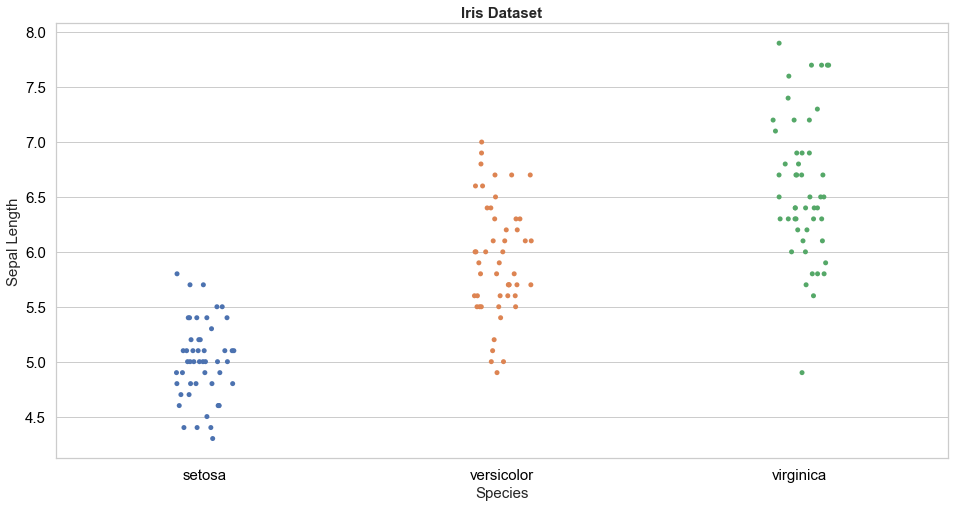

In [12]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
iris = sns.load_dataset('iris')
ax = sns.stripplot(x='species', y='sepal_length', data=iris)
plt.title('Iris Dataset', fontsize=15, fontweight='bold')
plt.xticks(size=15, color='black')
plt.yticks(size=15, color='black')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Sepal Length', fontsize=15)
plt.show()

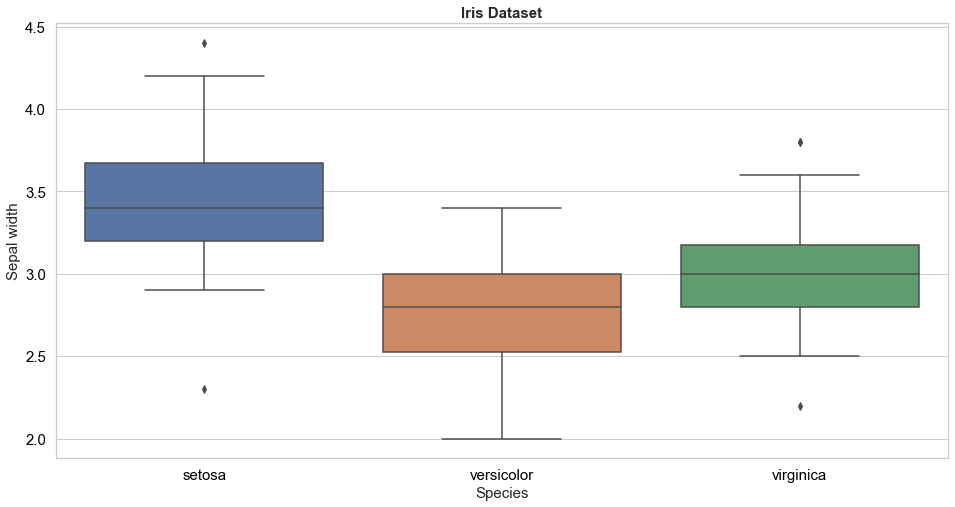

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(16,8))
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris Dataset', fontsize=15, fontweight='bold')
plt.xticks(size=15, color='black')
plt.yticks(size=15, color='black')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)
plt.show()

# Find the statistical Correlation and Covariance

In [14]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [15]:
X.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


# Plot the draw heatmap

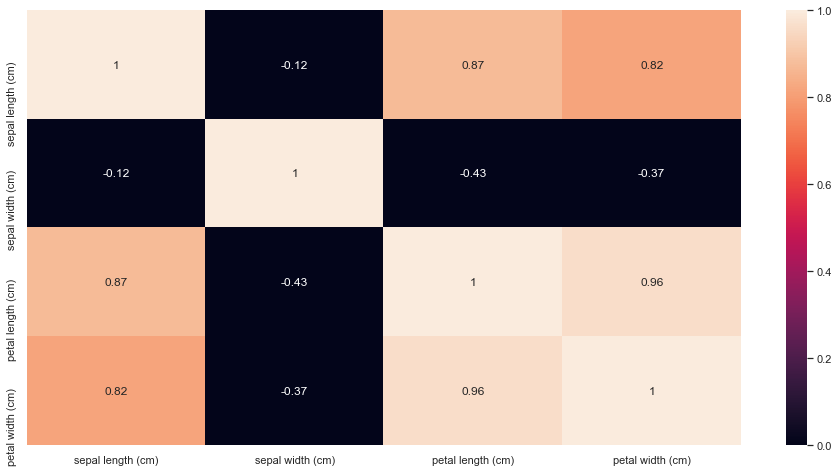

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(X.corr(), vmin=0, vmax=1, annot=True)
plt.show()

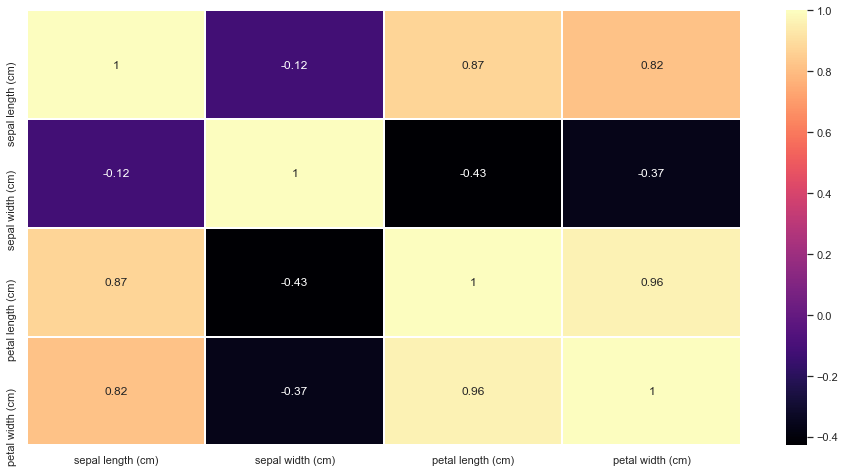

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(X.corr(), annot=True, linewidth=1, cmap='magma')
plt.show()

We can observed from above plot:
    
Petal length is highly related to petal width.  
Sepal length is not related to sepal width.   
Negative correlation of Sepal width with Petal length and Petal Width.

# Train the model

# Split dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the Decision Tree Algorithm

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [20]:
y_predict = dtc.predict(X_test)

# Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# Visualization of Trained Model

In [22]:
from sklearn import tree

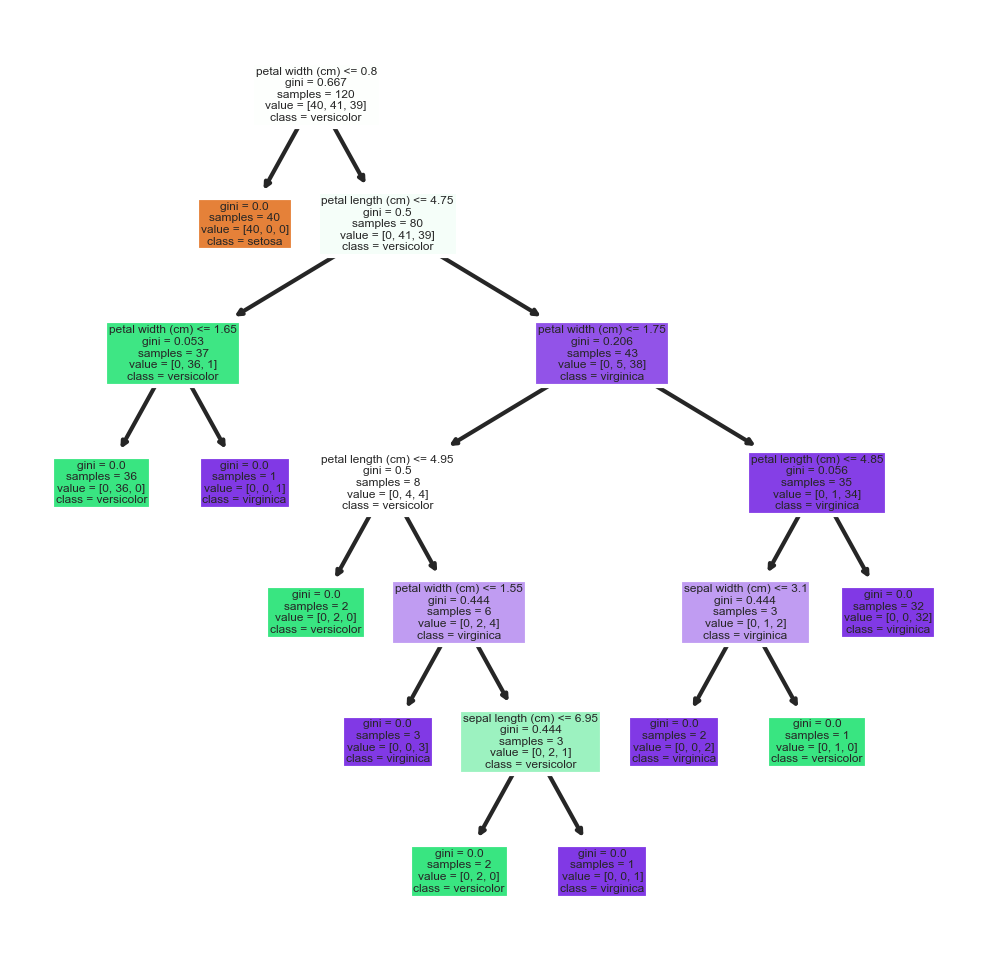

In [23]:

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtc, feature_names = fn, class_names = cn, filled = True);